In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [11]:
'''
Clean journal bibstems
    - Remove issue numbers and dots
    - NOTE: Overwrites ads_data.csv file
'''

data = pd.read_csv('Data/ads_data.csv')
data_out = data.copy()
for i in range(len(data)):
    bibstems = data['bibstem'].iloc[i].replace('[','').replace(']','').replace('\'','').split(', ')
    new_bibstems = []
    for bib in bibstems:
        bib = bib.replace('.','').replace(' ','')
        new_bib = ''.join([i for i in bib if not i.isdigit()])
        new_bibstems.append(new_bib)
    data_out['bibstem'].iloc[i] = new_bibstems
data_out.to_csv('Data/ads_data.csv', index=False)

/tmp/ipykernel_9664/3883092278.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_out['bibstem'].iloc[i] = new_bibstems


In [12]:
'''
Add "prestige ranking"
    - NOTE: Using 0 for open journls like arXiv and The Open Journal of Astrophysics
    - NOTE: Overwrites ads_data.csv file
'''
data = pd.read_csv('Data/ads_data.csv')

# Load dict of journal rankings
rankings = json.load(open("../journal_IFs.json"))

# Create dict of bibstems for each jounral
journal_bibstems = json.load(open("../bibstems.json"))

# Add rankings to data
journal_ranks = []
bibcodes_without_journals= []; journals_without_ranks = []
for i in range(len(data)):
    bibstems = data.iloc[i]['bibstem']
    # Get average rank of each bibstem
    rs = []
    for bibstem in bibstems.replace('[','').replace(']','').replace('\'','').split(','):
        bibstem = bibstem.replace(' ','') # splitting on the comma adds a space to the beginning of the second bibstem
        # Get journal name from bibstem
        try:
            journal = journal_bibstems[bibstem]
        except KeyError:
            journal = np.nan
            if bibstem not in bibcodes_without_journals: bibcodes_without_journals.append(bibstem)
        # Get journal rank
        try: 
            r = rankings[journal]
        except KeyError:
            r = np.nan
            if journal not in journals_without_ranks: journals_without_ranks.append(journal)
        rs.append(r)
    rank = np.nanmax(rs)
    journal_ranks.append(rank)

print(f'bibcodes_without_journals: {bibcodes_without_journals}')
print(f'journals_without_ranks: {journals_without_ranks}')

# Add journal ranks to data
data['journal_rank'] = journal_ranks
data.to_csv('Data/ads_data.csv', index=False)
display(data)

# # Add normalized and NaN-row dropped journal ranks to cleaned data
# data_clean['journal_rank'] = (journal_ranks - np.nanmean(journal_ranks)) / np.nanstd(journal_ranks) # Normalized
# data_clean = data_clean.dropna()
# print(f'Removed {len(data)-len(data_clean)} rows with nulls')
# data_clean.to_csv('Data/ads_data_clean.csv', index=False)

bibcodes_without_journals: ['NatAstmp', 'exop', 'exopbook', 'clrp']
journals_without_ranks: ['SPIE Monograph Series', 'Treatise on Geochemistry', nan, 'Soviet Scientific Reviews A Physics Reviews']


/tmp/ipykernel_9664/2625369469.py:36: RuntimeWarning: All-NaN axis encountered
  rank = np.nanmax(rs)


,bibcode,doi,author_count,aff,bibstem,citation_count,arxiv_class,year,read_count,download_count,journal_rank
0,2021arXiv210508081T,10.48550/arXiv.2105.08081,2,"['-', '-']","['arXiv', 'arXiv']",5,"['astro-ph.EP', 'astro-ph.IM', 'physics.pop-ph']",2021,77308,3311,0.0
1,2020A&A...641A...6P,10.48550/arXiv.1807.06209,182,"['-', ""Institut d'Astrophysique Spatiale, CNRS...","['A&A', 'A&A']",14623,['astro-ph.CO'],2020,29427,9958,5.4
2,2024ApJ...962L..15J,10.48550/arXiv.2401.10502,2,"['Southwest Research Institute, Boulder, CO 80...","['ApJL', 'ApJL']",7,['astro-ph.SR'],2024,10817,173,8.8
3,2016A&A...594A..13P,10.48550/arXiv.1502.01589,262,"['-', 'School of Physics and Astronomy, Cardif...","['A&A', 'A&A']",12517,['astro-ph.CO'],2016,32827,9624,5.4
4,2013PASP..125..306F,10.48550/arXiv.1202.3665,4,"['-', '-', '-', '-']","['PASP', 'PASP']",10133,"['astro-ph.IM', 'physics.comp-ph', 'stat.CO']",2013,21587,6571,3.3
...,...,...,...,...,...,...,...,...,...,...,...
994,2011Ap&SS.332....1R,10.48550/arXiv.1101.5036,1,"['IESL, Foundation for Research and Technology...","['Ap&SS', 'Ap&SS']",488,['astro-ph.HE'],2011,3793,2335,1.8
995,2010AJ....139.2360S,10.48550/arXiv.1004.1167,48,"['Department of Astronomy and Astrophysics, Th...","['AJ', 'AJ']",886,['astro-ph.CO'],2010,6820,3276,5.1
996,2010ApJ...721.1014M,10.48550/arXiv.1004.0276,13,"['Department of Astronomy, University of Washi...","['ApJ', 'ApJ']",572,['astro-ph.CO'],2010,4941,2708,4.8
997,2010Natur.468.1080M,10.48550/arXiv.1011.4918,5,"['National Research Council Canada, Herzberg I...","['Natur', 'Natur']",740,['astro-ph.EP'],2010,5538,3014,69.5


Numerical Columns: Index(['author_count', 'citation_count', 'year', 'read_count',
       'download_count', 'journal_rank'],
      dtype='object')


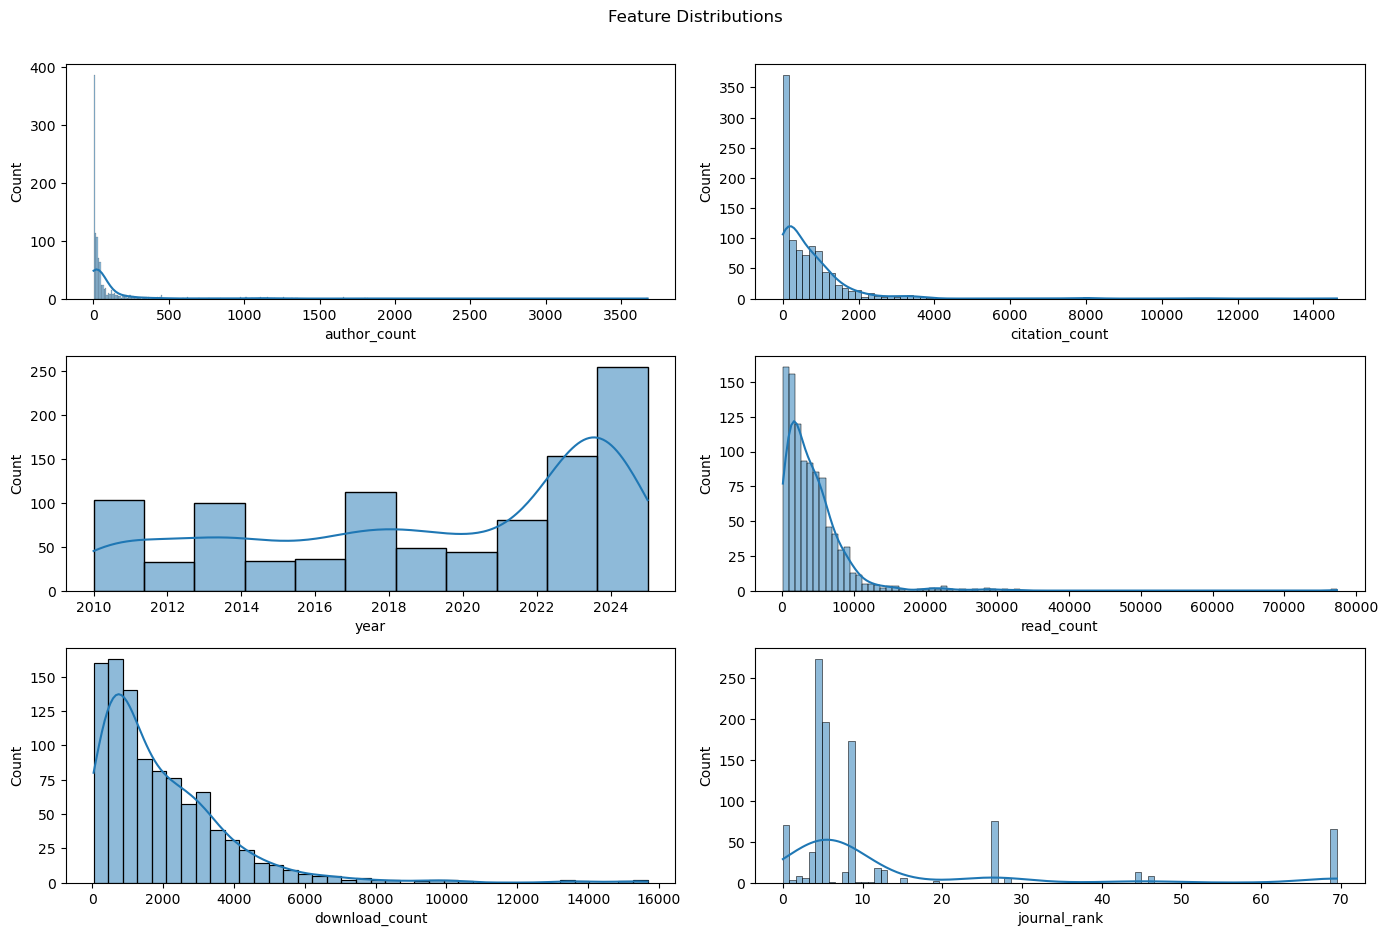

In [16]:
'''
Explore Feature Distributions For Updated Data
'''

data = pd.read_csv('Data/ads_data.csv')
numerical_cols = data.select_dtypes(include=[np.float64, np.int64]).columns
print('Numerical Columns:', numerical_cols)
fig = plt.figure(figsize=(14, len(numerical_cols)*3))
plt.suptitle('Feature Distributions')
for idx, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 2, idx)
    sns.histplot(data[col], kde=True)
plt.tight_layout()
fig.subplots_adjust(top=0.95)

In [13]:
'''
Remove NaNs
 - There are only 84 rows with NaNs, so we can drop them
'''

data = pd.read_csv('Data/ads_data.csv')
print(f'Null counts:\n\n{data.isnull().sum()}')
data_dropna = data.copy().dropna()
print(f'\nRemoved {len(data)-len(data_dropna)} rows with nulls')

Null counts:

bibcode           0
doi               0
author_count      0
aff               0
bibstem           0
citation_count    0
arxiv_class       0
year              0
read_count        0
download_count    0
journal_rank      7
dtype: int64

Removed 7 rows with nulls


In [44]:
'''
Count empty 'affiliation' lists
 - Can't clean into lists because saving as csv will convert back to strings
 - There are 124 rows with empty lists, which might be too many to drop. 
'''

count = 0
for i in range(len(data_dropna)):
    aff_list = data_dropna['aff'].iloc[i].replace('[','').replace(']','').replace('\'','').split(', ')
    if np.all([x == '-' for x in aff_list]):
        count += 1
    #data_dropna['aff'].iloc[i] = aff_list 
print(f'Number of empty affiliation lists: {count}')

Number of empty affiliation lists: 105


In [14]:
'''
Normalization
'''
data_clean = data_dropna.copy()
numerical_cols = data.select_dtypes(include=[np.float64, np.int64]).columns
for col in numerical_cols:
    data_clean[col] = (data[col] - data[col].mean()) / data[col].std()
data_clean.to_csv('Data/ads_data_clean.csv', index=False)

In [15]:
data_clean = pd.read_csv('Data/ads_data_clean.csv')
data_clean

,bibcode,doi,author_count,aff,bibstem,citation_count,arxiv_class,year,read_count,download_count,journal_rank
0,2021arXiv210508081T,10.48550/arXiv.2105.08081,-0.342659,"['-', '-']","['arXiv', 'arXiv']",-0.590127,"['astro-ph.EP', 'astro-ph.IM', 'physics.pop-ph']",0.399746,15.781133,0.691080,-0.718169
1,2020A&A...641A...6P,10.48550/arXiv.1807.06209,0.411490,"['-', ""Institut d'Astrophysique Spatiale, CNRS...","['A&A', 'A&A']",11.308851,['astro-ph.CO'],0.191319,5.439945,4.147883,-0.405034
2,2024ApJ...962L..15J,10.48550/arXiv.2401.10502,-0.342659,"['Southwest Research Institute, Boulder, CO 80...","['ApJL', 'ApJL']",-0.588499,['astro-ph.SR'],1.025027,1.420615,-0.940852,-0.207874
3,2016A&A...594A..13P,10.48550/arXiv.1502.01589,0.746667,"['-', 'School of Physics and Astronomy, Cardif...","['A&A', 'A&A']",9.594578,['astro-ph.CO'],-0.642389,6.174266,3.974185,-0.405034
4,2013PASP..125..306F,10.48550/arXiv.1202.3665,-0.334280,"['-', '-', '-', '-']","['PASP', 'PASP']",7.654014,"['astro-ph.IM', 'physics.comp-ph', 'stat.CO']",-1.267670,3.746686,2.386458,-0.526809
...,...,...,...,...,...,...,...,...,...,...,...
987,2011Ap&SS.332....1R,10.48550/arXiv.1101.5036,-0.346849,"['IESL, Foundation for Research and Technology...","['Ap&SS', 'Ap&SS']",-0.196967,['astro-ph.HE'],-1.684524,-0.096406,0.183506,-0.613791
988,2010AJ....139.2360S,10.48550/arXiv.1004.1167,-0.149932,"['Department of Astronomy and Astrophysics, Th...","['AJ', 'AJ']",0.127003,['astro-ph.CO'],-1.892951,0.557356,0.672878,-0.422430
989,2010ApJ...721.1014M,10.48550/arXiv.1004.0276,-0.296572,"['Department of Astronomy, University of Washi...","['ApJ', 'ApJ']",-0.128592,['astro-ph.CO'],-1.892951,0.151535,0.377487,-0.439827
990,2010Natur.468.1080M,10.48550/arXiv.1011.4918,-0.330090,"['National Research Council Canada, Herzberg I...","['Natur', 'Natur']",0.008160,['astro-ph.EP'],-1.892951,0.280474,0.536624,3.312001


Numerical Columns: Index(['author_count', 'citation_count', 'year', 'read_count',
       'download_count', 'journal_rank'],
      dtype='object')


<AxesSubplot:title={'center':'Feature Correlations'}>

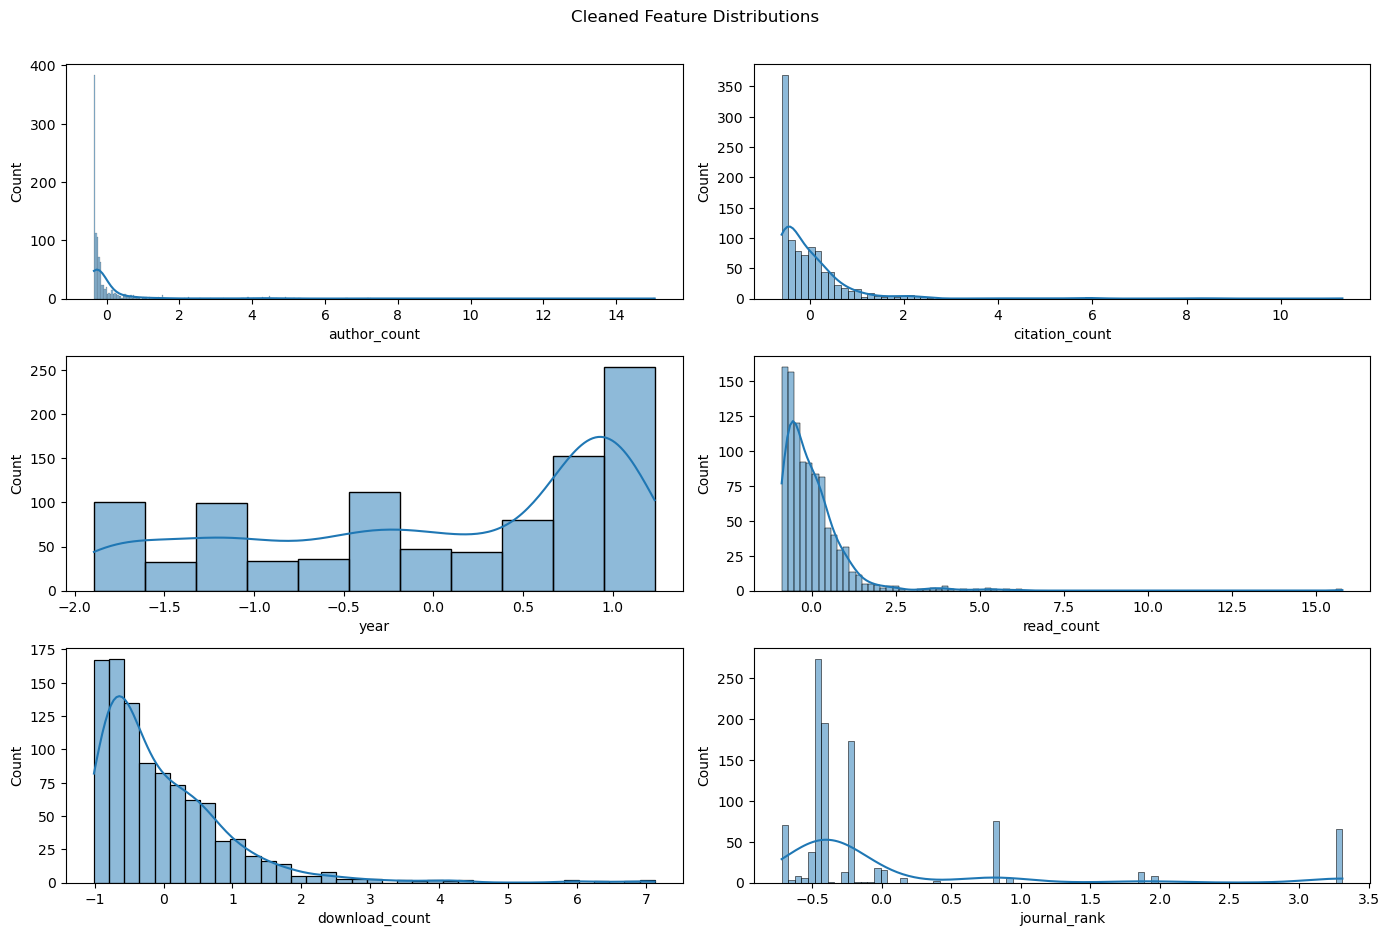

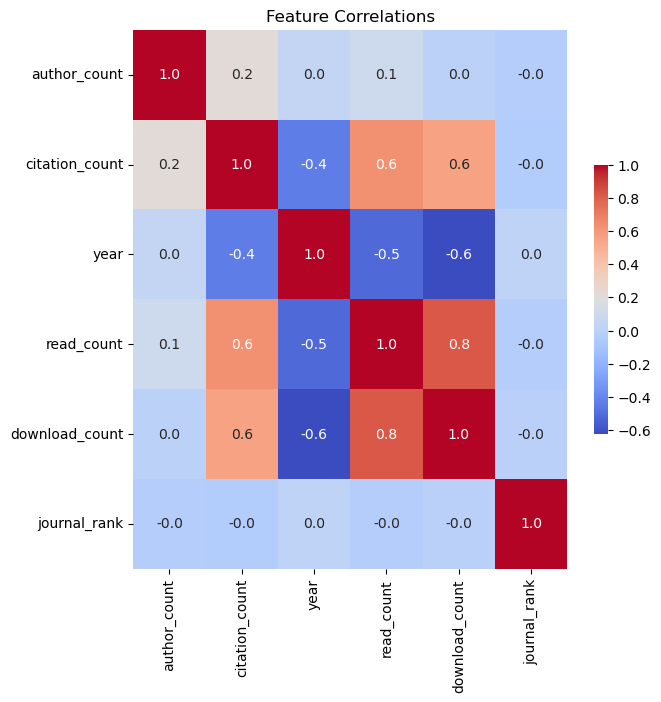

In [18]:
'''
Perform plots again on cleaned data
'''

# Plot feature distributions
data_clean = pd.read_csv('Data/ads_data_clean.csv')
numerical_cols = data_clean.select_dtypes(include=[np.float64, np.int64]).columns
print('Numerical Columns:', numerical_cols)
fig = plt.figure(figsize=(14, len(numerical_cols)*3))
plt.suptitle('Cleaned Feature Distributions')
for idx, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 2, idx)
    sns.histplot(data_clean[col], kde=True)
plt.tight_layout()
fig.subplots_adjust(top=0.95)

# Plot feature correlations
corr = data[numerical_cols].corr()
fig = plt.figure(figsize=(7, 7))
plt.title('Feature Correlations')
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".1f", cbar_kws={"shrink": 0.5})

In [ ]:
'''
Explore affiliations
'''
data_clean = pd.read_csv('Data/ads_data_clean.csv')
affiliation_counts = pd.DataFrame(data_clean['aff'].value_counts())
for i in range(len(data_clean)):
    aff_list = data_clean['aff'].iloc[i].replace('[','').replace(']','').replace('; ','\', \'').replace('"','\'').split(", '") # data_clean['aff'].iloc[i].replace('[','').replace(']','').replace(';','').split(", '")
    aff_list = list(set([aff.replace('\'','') for aff in aff_list]))
    for aff in aff_list:
        if aff in affiliation_counts:
            affiliation_counts[aff] += 1
        else:
            affiliation_counts[aff] = 1
affiliation_counts

fig, ax = plt.subplots(figsize=(10, 10))


In [86]:
'''
Dump rankings from downloaded file to json
'''
rankings = {} # pd.DataFrame(columns=['Title', 'Rank'])
f = open('Data/journal_IFs.txt').read() # open('Data/journal_rankings.txt').read()#, index_col='Title', usecols=['Title', 'Rank'])
lines = f.split('\n')
for line in lines:
    title = line.split('\t')[1].replace('"','')
    IF = float(line.split('\t')[2][4:])
    rankings[f'{title}'] = IF #rankings.loc[len(rankings)] = {'Title': title, 'Rank': IF}
keys = list(rankings.keys())
keys.sort()
sorted_rankings = {i: rankings[i] for i in keys}
json.dump(sorted_rankings, open('Data/journal_IFs.json', 'w'), indent=4)


(array([ 74.,  12.,  38., 470.,   1.,  13., 174.,   1.,  19.,  15.,   6.,
          0.,   0.,   2.,   0.,   0.,   0.,   0.,  75.,   0.,   6.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  13.,
          8.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,  65.]),
 array([-0.71853149, -0.63788744, -0.55724338, -0.47659932, -0.39595526,
        -0.3153112 , -0.23466714, -0.15402309, -0.07337903,  0.00726503,
         0.08790909,  0.16855315,  0.24919721,  0.32984126,  0.41048532,
         0.49112938,  0.57177344,  0.6524175 ,  0.73306155,  0.81370561,
         0.89434967,  0.97499373,  1.05563779,  1.13628185,  1.2169259 ,
         1.29756996,  1.37821402,  1.45885808,  1.53950214,  1.6201462 ,
         1.70079025,  1.78143431,  1.86207837,  1.94272243,  2.02336649,
         2.10401055,  2.1846546 ,  2.26529866,  2.34594272,  2.42658678,
         2.50723084,  2.58787489,  2.66851895,  2.74916301,  2.82980707,
 

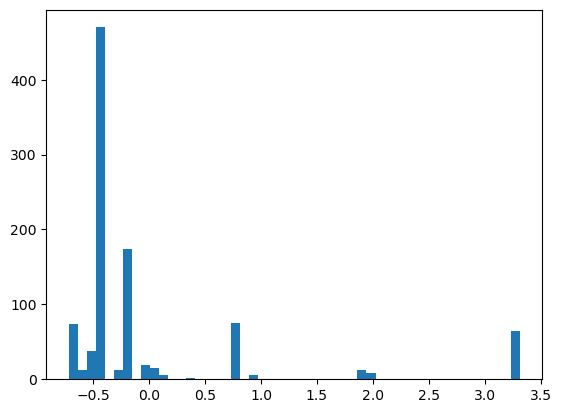

In [ ]:
data_clean = pd.read_csv('Data/ads_data_clean.csv')
plt.hist(data_clean['Journal_Rank'], bins=50)